# Modelo Machine Learning -  Teste tamanho e forma

Esse notebook mostra como foi feito o modelo de Machine Learning utilizado para avaliar o tamnho e forma das peças.

In [4]:
#Célula de imports
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from filtros_extras import *
from fillHoles import fillHoles

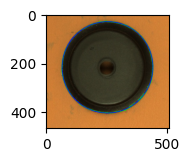

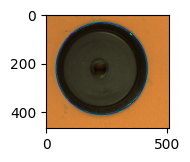

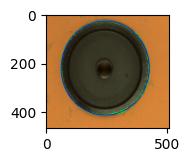

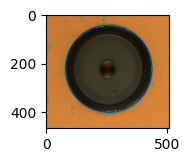

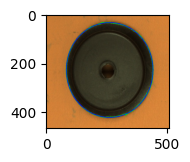

In [5]:
# path = "OK"
path = "NOK_tamanho_forma/"
dir_list = os.listdir(path)
for k in range(0,len(dir_list)):
    #encontrar uma maneira mais bonita de fazer a soma das strings abaixo
    img_in = cv2.imread(path + "/" + str(dir_list[k]), cv2.IMREAD_COLOR)
    #img_in = cv2.imread("OK\Fig_OK_15.jpg", cv2.IMREAD_COLOR)
    if img_in is None:
        print("File not found. Bye!")
        exit(0) #Essa linha "crasha" o notebook, caso ocorra reinicar o kernel
    [B,G,R] = cv2.split(img_in)
    
#     plt.figure(figsize=(10,5))
#     plt.subplot (3,5,k+1)
#     plt.imshow(B, cmap="gray")
    returns,thresh=cv2.threshold(B,120,255,cv2.THRESH_BINARY_INV)
    thresh_inverse_8=np.clip(thresh, 0, 255).astype(np.uint8)
    img_out=fillHoles(thresh_inverse_8)
    contours,hierachy=cv2.findContours(img_out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) != 0:
        max_contours = max(contours, key=len)
        cv2.drawContours(img_in,[max_contours],-1,(0,255,0),3)
        ellipse = cv2.fitEllipse(max_contours)
        cv2.ellipse(img_in,ellipse, (0,0,255), 2)
        plt.figure(figsize=(10,5))
        plt.subplot (3,5,k+1)
        plt.imshow(img_in, cmap="gray")
        (x, y), (MA, ma), angle = ellipse
        diametro=(MA + ma)/508*65/2
        if MA/ma>0.95 and MA/ma<1.05 and diametro<50.5 and diametro>49.5 :
            print('imagem de indice '+str(k+1))
            print((MA + ma)/508*65/2)
plt.show()


imagem de indice 1
49.69681446946512
imagem de indice 2
49.67896949587845
imagem de indice 3
49.937014842596575
imagem de indice 4
49.786500104769004
imagem de indice 5
49.78334111491526
imagem de indice 6
49.873682758000896
imagem de indice 7
49.59847773153951
imagem de indice 8
49.82231500580555
imagem de indice 9
49.6726749450203
imagem de indice 10
49.602448921503985
imagem de indice 11
49.66870961226816
imagem de indice 13
49.89381985401544
imagem de indice 14
49.86000616719404
imagem de indice 15
49.675353643462415


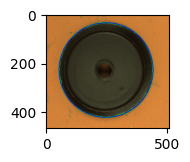

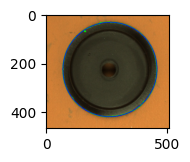

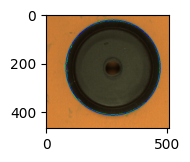

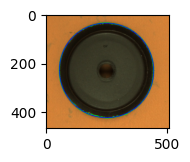

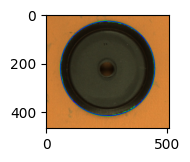

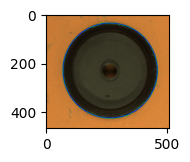

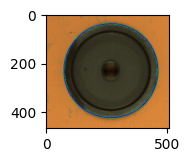

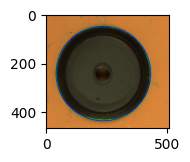

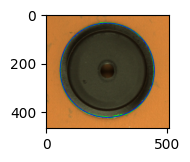

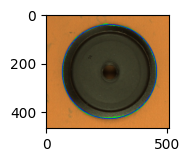

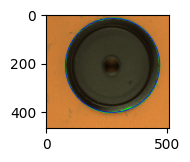

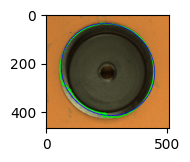

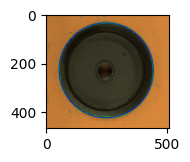

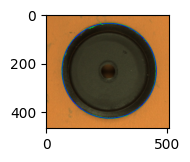

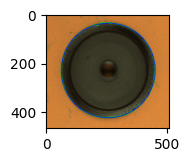

In [6]:
path = "OK"
dir_list = os.listdir(path)
for k in range(0,len(dir_list)):
    #encontrar uma maneira mais bonita de fazer a soma das strings abaixo
    img_in = cv2.imread(path + "/" + str(dir_list[k]), cv2.IMREAD_COLOR)
    #img_in = cv2.imread("OK\Fig_OK_15.jpg", cv2.IMREAD_COLOR)
    if img_in is None:
        print("File not found. Bye!")
        exit(0) #Essa linha "crasha" o notebook, caso ocorra reinicar o kernel
    [B,G,R] = cv2.split(img_in)
    
#     plt.figure(figsize=(10,5))
#     plt.subplot (3,5,k+1)
#     plt.imshow(B, cmap="gray")
    returns,thresh=cv2.threshold(B,120,255,cv2.THRESH_BINARY_INV)
    thresh_inverse_8=np.clip(thresh, 0, 255).astype(np.uint8)
    img_out=fillHoles(thresh_inverse_8)
    contours,hierachy=cv2.findContours(img_out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) != 0:
        max_contours = max(contours, key=len)
        cv2.drawContours(img_in,[max_contours],-1,(0,255,0),3)
        ellipse = cv2.fitEllipse(max_contours)
        cv2.ellipse(img_in,ellipse, (0,0,255), 2)
        plt.figure(figsize=(10,5))
        plt.subplot (3,5,k+1)
        plt.imshow(img_in, cmap="gray")
        (x, y), (MA, ma), angle = ellipse
        diametro=(MA + ma)/508*65/2
        if MA/ma>0.95 and MA/ma<1.05 and diametro<50.5 and diametro>49.5 :
            print('imagem de indice '+str(k+1))
            print((MA + ma)/508*65/2)
plt.show()


## Conclui-se assim que é possível distiguir corretamente 18/19 imagens em relação a tamanho e forma.